# Exploratory Data Analysis (EDA)

This notebook performs complete **EDA (Sections 3.1–3.9)** for the obesity prediction dataset.
Ensure your dataset (`train.csv`) contains the following columns:

`Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, WeightCategory`


In [1]:
# 🧠 Load dataset
import pandas as pd

DATA_PATH = r"E:\Dev\Desktop\Folder\Learning\Subjects\Sem-3\Machine_Learning\Project\Visualization\train.csv"  # <-- Change this path
df = pd.read_csv(DATA_PATH)

# Drop 'id' column if it exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

print(f"✅ Dataset loaded successfully with shape: {df.shape}")
display(df.head())

✅ Dataset loaded successfully with shape: (15533, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## 3.1 Class Distribution in the Dataset

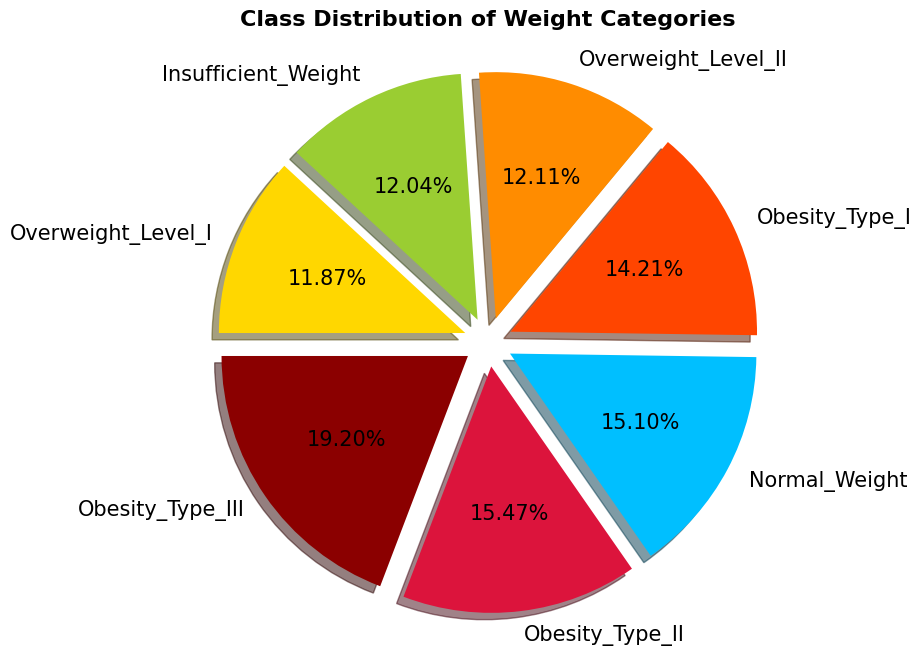

In [2]:
import matplotlib.pyplot as plt

custom_colors = {
    'Insufficient_Weight': '#9ACD32',
    'Normal_Weight': '#00BFFF',
    'Overweight_Level_I': '#FFD700',
    'Overweight_Level_II': '#FF8C00',
    'Obesity_Type_I': '#FF4500',
    'Obesity_Type_II': '#DC143C',
    'Obesity_Type_III': '#8B0000'
}

plt.figure(figsize=(10,8))
data = df['WeightCategory'].value_counts().values.tolist()
label = df['WeightCategory'].value_counts().index.tolist()
plt.pie(data, labels=label, colors=[custom_colors.get(c, '#999999') for c in label],
        autopct='%.2f%%', startangle=180, explode=[0.1]*len(label), shadow=True)

for text in plt.gca().texts:
    text.set_fontsize(15)
plt.title("Class Distribution of Weight Categories", fontsize=16, fontweight='bold')
plt.show()

## 3.2 Features and their Distribution

C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\601318168.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_visu, x=col, ax=ax, palette="Set2")
C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\601318168.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_visu, x=col, ax=ax, palette="Set2")
C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\601318168.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_visu, x=col, ax=ax, palette="Set2")
C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\601318168.py:40: FutureWarni

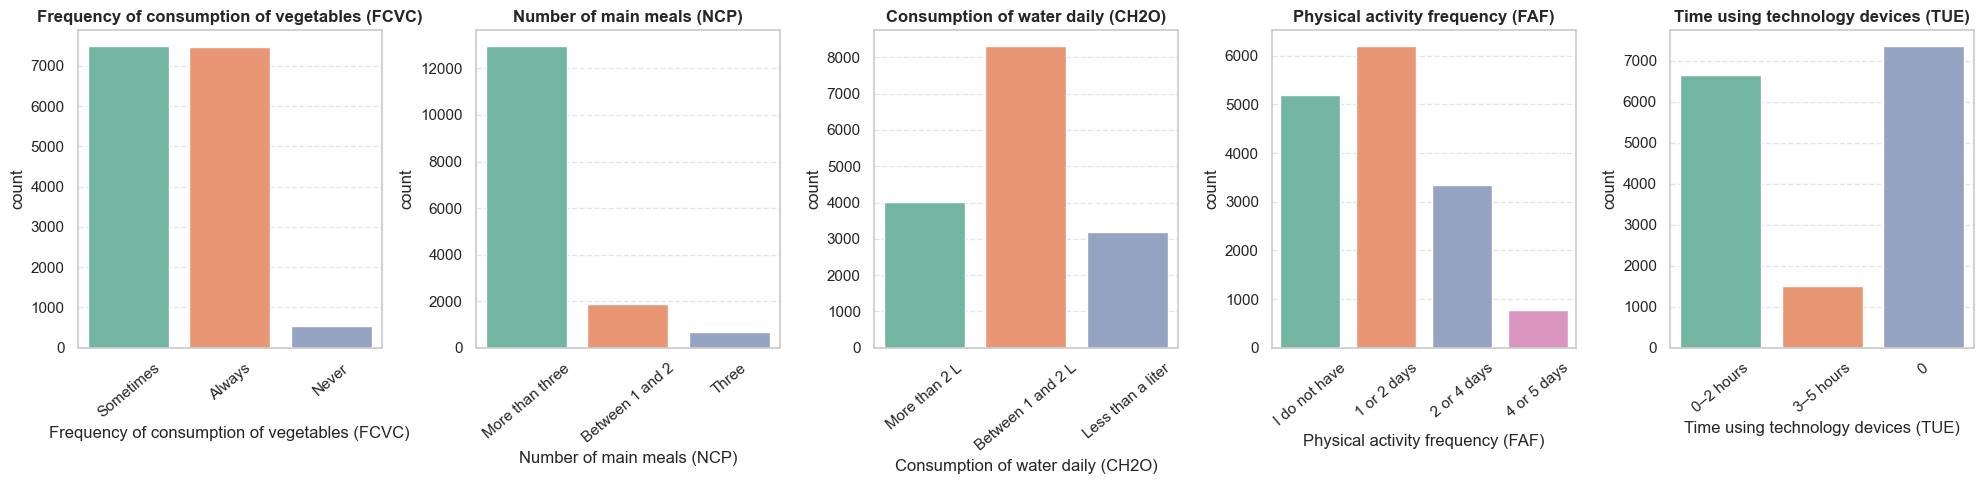

In [3]:
import seaborn as sns
from itertools import islice

df_visu = df.copy()

columns = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in columns:
    if column in df_visu.columns:
        df_visu[column] = df_visu[column].round().astype(int)

mapping = {
    'NCP': {'1': 'Between 1 and 2', '2': 'Three', '3': 'More than three', '4': 'More than three'},
    'CH2O': {'1': 'Less than a liter', '2': 'Between 1 and 2 L', '3': 'More than 2 L'},
    'FAF': {'0': 'I do not have', '1': '1 or 2 days', '2': '2 or 4 days', '3': '4 or 5 days'},
    'TUE': {'1': '0–2 hours', '2': '3–5 hours', '3': 'More than 5 hours'},
    'FCVC': {'1': 'Never', '2': 'Sometimes', '3': 'Always'},
}

for column in columns:
    if column in mapping:
        df_visu[column] = df_visu[column].astype(str).replace(mapping[column])

new_column_names = {
    'FCVC': 'Frequency of consumption of vegetables (FCVC)',
    'NCP': 'Number of main meals (NCP)',
    'CH2O': 'Consumption of water daily (CH2O)',
    'FAF': 'Physical activity frequency (FAF)',
    'TUE': 'Time using technology devices (TUE)',
}

df_visu.rename(columns=new_column_names, inplace=True)
column_values = list(islice(new_column_names.values(), 5))

sns.set_theme(style="whitegrid", palette="Set2")
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.flatten()

for i, col in enumerate(column_values):
    ax = axes[i]
    sns.countplot(data=df_visu, x=col, ax=ax, palette="Set2")
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=40)
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 3.3 Female vs Male Weight Category Distribution

C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\3089132672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=X, y=Y, ax=axis[i], palette=custom_colors)
C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\3089132672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=X, y=Y, ax=axis[i], palette=custom_colors)


<Figure size 1500x1000 with 0 Axes>

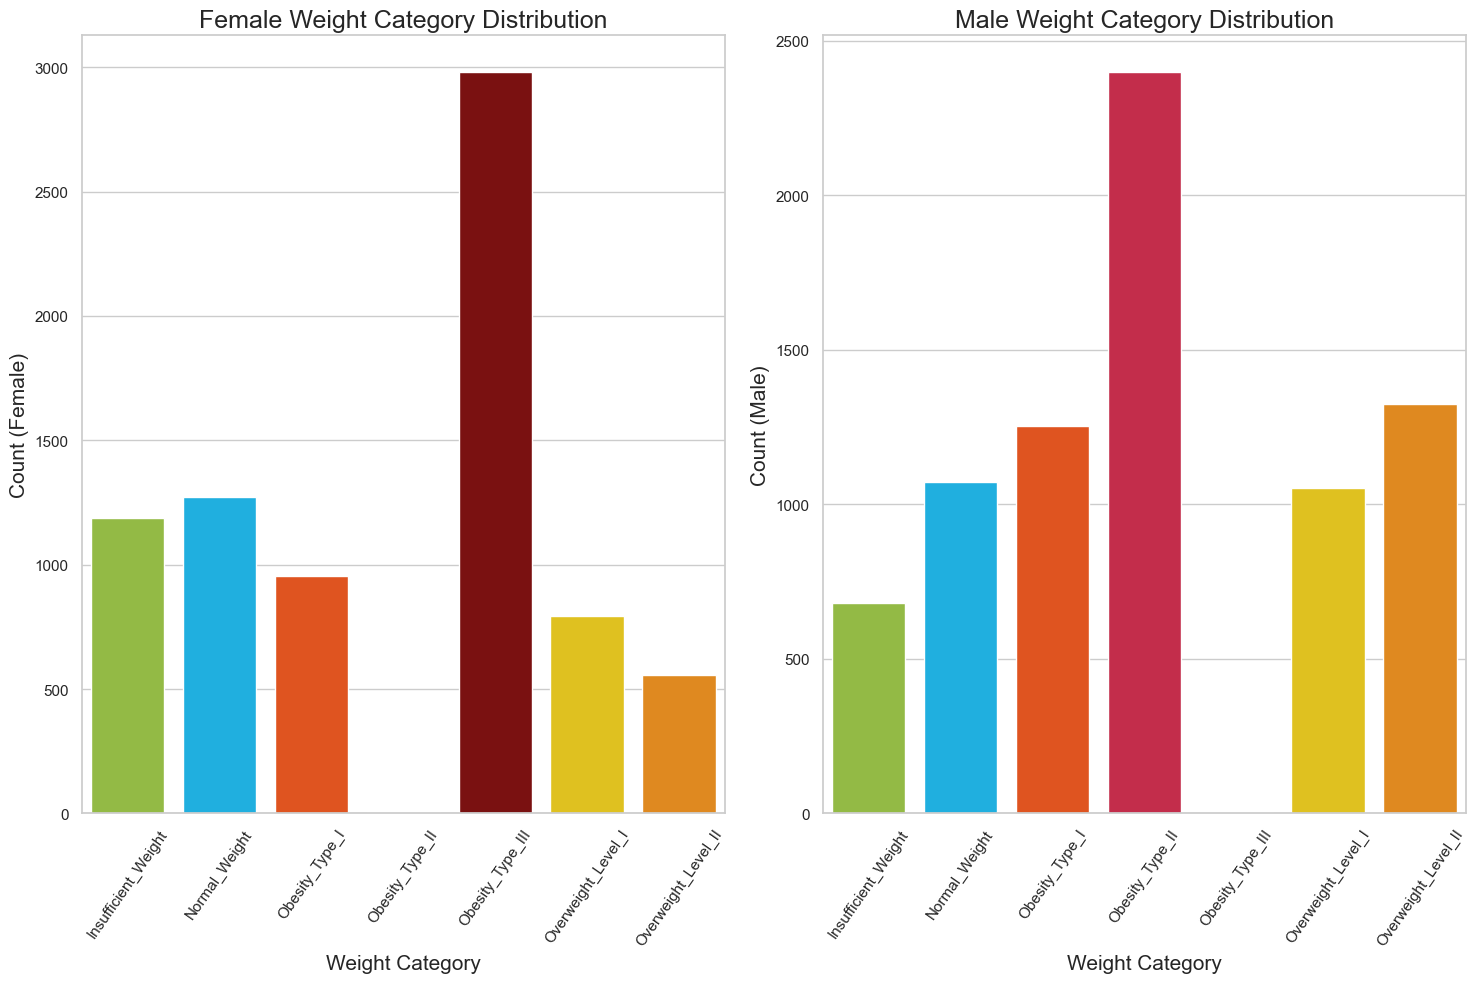

In [4]:
df_gender_OL = df.groupby(['WeightCategory', 'Gender']).size().unstack()
plt.figure(figsize=(15, 10))
fig, axis = plt.subplots(figsize=(15, 10), nrows=1, ncols=2)

Gender = ["Female", "Male"]
for i in range(2):
    X = df_gender_OL.index.tolist()
    Y = df_gender_OL[Gender[i]].values.tolist()
    ax = sns.barplot(x=X, y=Y, ax=axis[i], palette=custom_colors)
    axis[i].set_title(f'{Gender[i]} Weight Category Distribution', fontsize=18)
    axis[i].set_xlabel("Weight Category", fontsize=15)
    axis[i].set_ylabel(f'Count ({Gender[i]})', fontsize=15)
    axis[i].tick_params(axis='x', rotation=55)

plt.tight_layout()
plt.show()

## 3.4 Physical Activity across Genders according to Weight Category

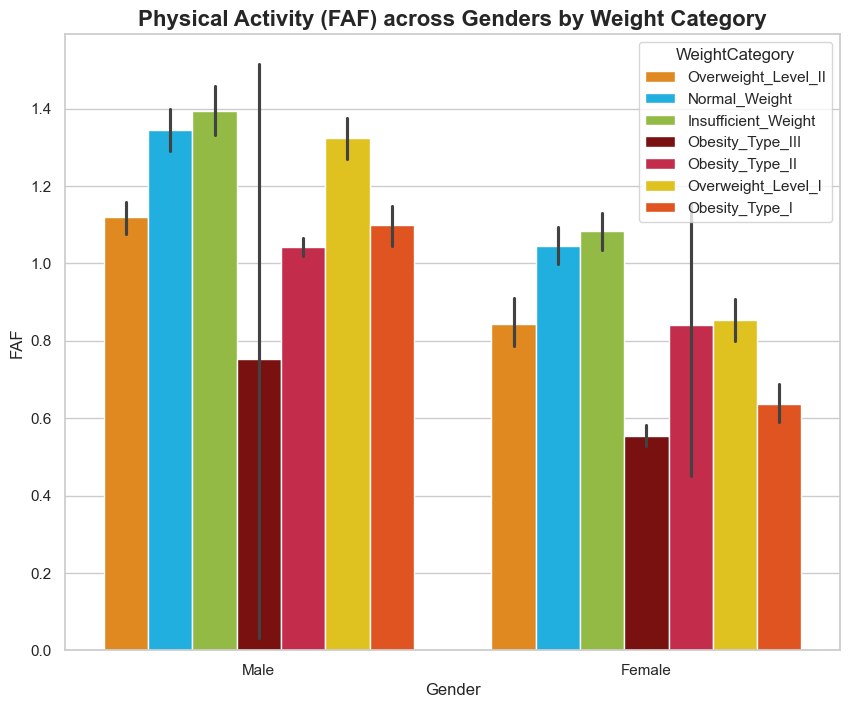

In [5]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='Gender', y='FAF', hue='WeightCategory', palette=custom_colors)
plt.title("Physical Activity (FAF) across Genders by Weight Category", fontsize=16, fontweight='bold')
plt.show()

## 3.5 Other Features vs. Weight Categories

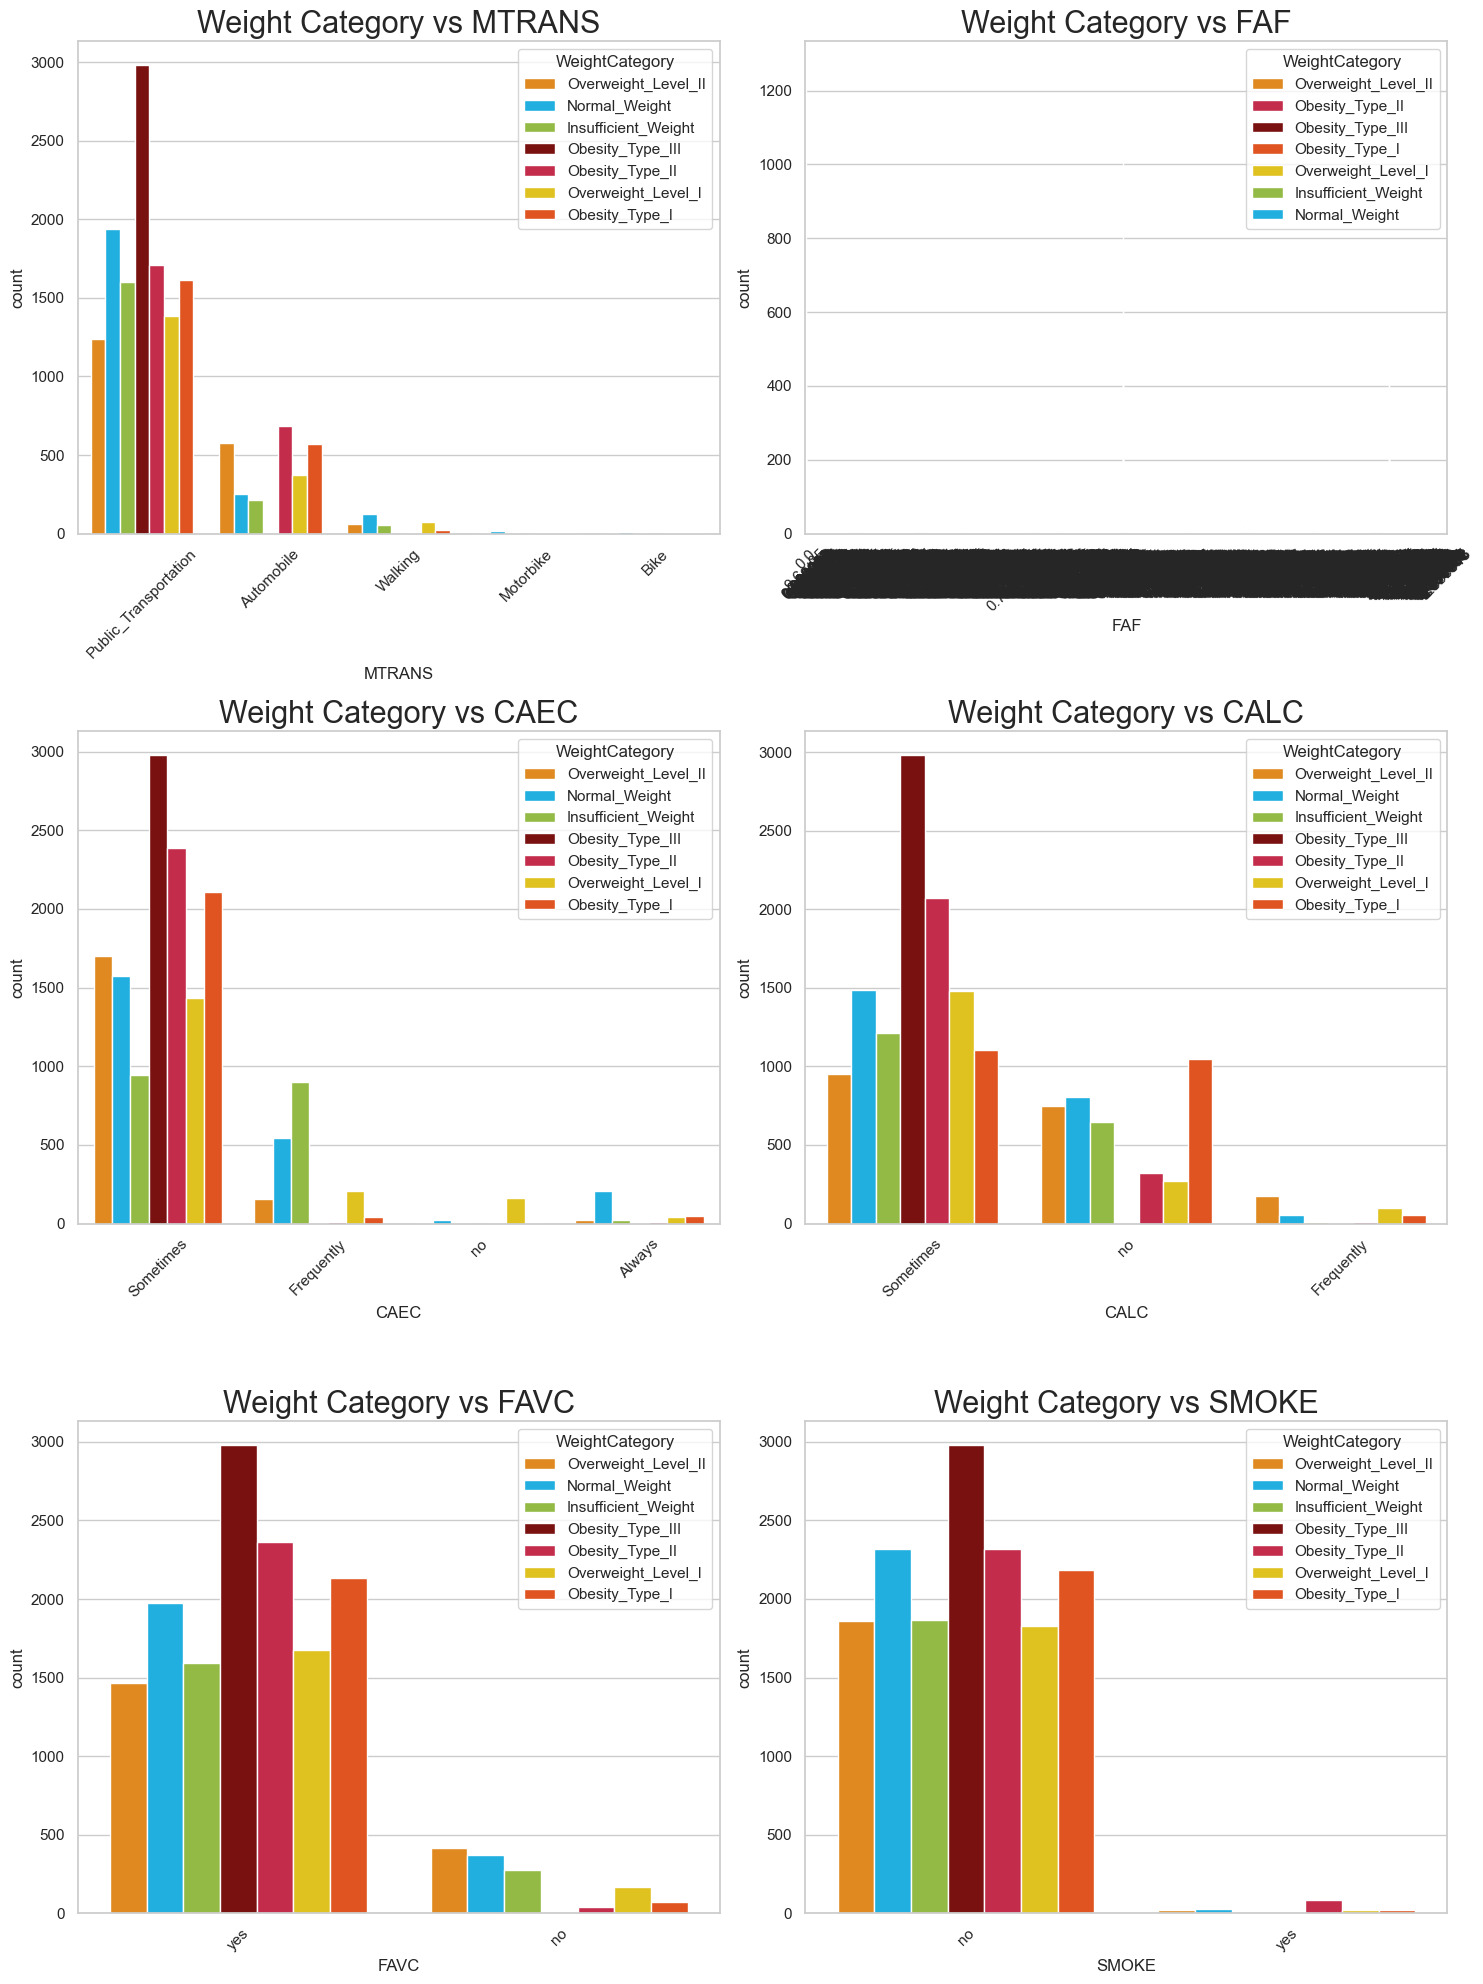

In [6]:
col = ['MTRANS', 'FAF', 'CAEC', 'CALC', 'FAVC', 'SMOKE']
fig, axes = plt.subplots(figsize=(15, 20), nrows=3, ncols=2)
axes = axes.flatten()

for i in range(len(col)):
    sns.countplot(data=df, x=col[i], hue='WeightCategory', palette=custom_colors, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Weight Category vs {col[i]}', fontsize=22)

plt.tight_layout()
plt.show()

## 3.6 Weight Category vs Height, Vegetables, and Water Intake

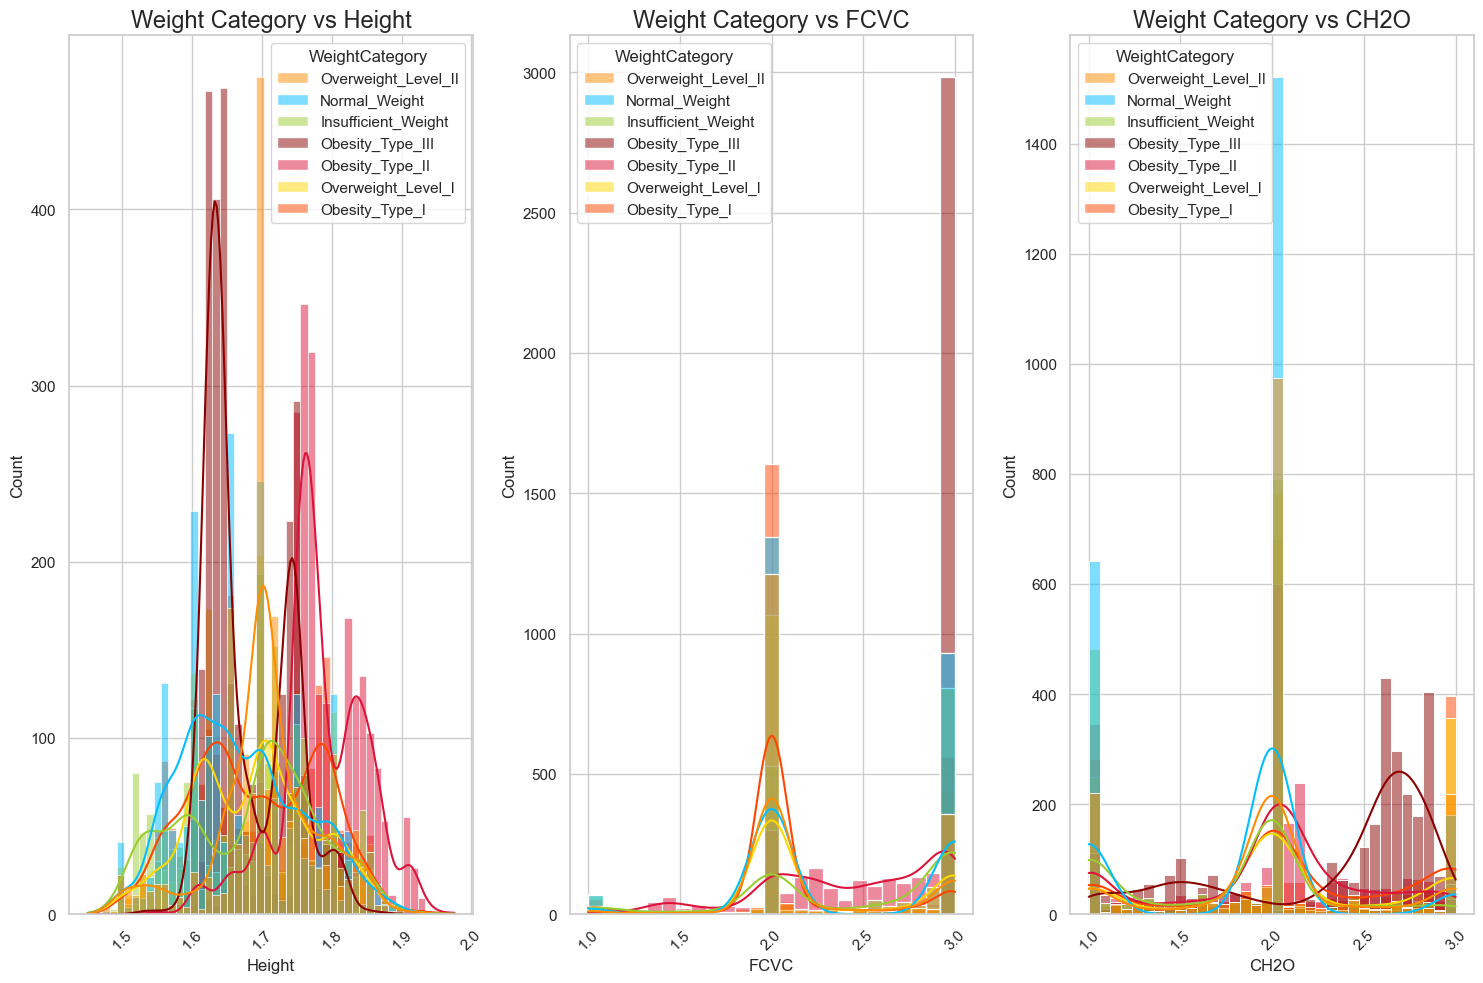

In [7]:
col = ['Height', 'FCVC', 'CH2O']
fig, axes = plt.subplots(figsize=(15, 10), nrows=1, ncols=3)
axes = axes.flatten()

for j in range(len(col)):
    sns.histplot(data=df, x=col[j], hue='WeightCategory', palette=custom_colors, ax=axes[j], kde=True)
    axes[j].tick_params(axis='x', rotation=45)
    axes[j].set_title(f'Weight Category vs {col[j]}', fontsize=17)

plt.tight_layout()
plt.show()

## 3.7 Age vs Other Features

In [ ]:
cols = ['CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'FAF', 'MTRANS']
df['Age'] = df['Age'].astype(int)
fig, axes = plt.subplots(figsize=(17, 25), nrows=4, ncols=2)
axes = axes.flatten()

for i in range(len(cols)):
    sns.histplot(data=df, hue=df[cols[i]], x='Age', ax=axes[i], kde=True)
    axes[i].set_ylabel(f'{cols[i]} frequency', fontsize=15)
    axes[i].set_xlabel("Age", fontsize=15)
    axes[i].set_title(f'Age vs {cols[i]}', fontsize=20)
    plt.tight_layout()

for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)

plt.show()

C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\3194219816.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\3194219816.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\3194219816.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Dev\AppData\Local\Temp\ipykernel_33460\3194219816.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


## 3.8 BMI Distribution and Weight Category Classification

In [ ]:
def plot_numerical_features_target(df_visu):
    numeric_cols = df_visu.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        plt.figure(figsize=(8,4))
        sns.histplot(data=df_visu, x=col, hue='WeightCategory', kde=True, palette=custom_colors)
        plt.title(f'Distribution of {col} by Weight Category')
        plt.show()

df_visu = df.copy()
plot_numerical_features_target(df_visu)

## 3.9 Feature Relationships Across Weight Categories

In [ ]:
colors_2 = ["#2D5653", "#02231C", "#a62c7f","#b6000f", "#5c1a86","#ff6b22","#fffc22"]

def plot_categorical_features_target(df_visu, color_palette):
    cat_cols = df_visu.select_dtypes(include=['object']).columns
    for col in cat_cols:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df_visu, x=col, hue='WeightCategory', palette=color_palette)
        plt.title(f'{col} vs Weight Category')
        plt.xticks(rotation=40)
        plt.tight_layout()
        plt.show()

plot_categorical_features_target(df_visu, color_palette=colors_2)